#### Answers submitted by:  Daniel Friedman
#### Date:  3/25/2017
---

# Python Part 3:  Pandas Exercises
---

## Q1:  Read in the libraries you need

In [128]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

In [129]:
# imports a library 'pandas', names it as 'pd'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

## Q2:  Set options in pandas so it displays `max_rows` to 10

In [130]:
# set various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.precision', 3)

## Q3:  What versions of `Python` and `pandas` are you running?  



In [131]:
print("Pandas version:", pd.__version__)
print("Numpy version:", np.__version__)

Pandas version: 0.19.2
Numpy version: 1.11.3


In [132]:
# confirming which version of Python I am using
import sys
print("Python Version:", sys.version)

Python Version: 3.6.0 |Anaconda 4.3.1 (x86_64)| (default, Dec 23 2016, 13:19:00) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


## Q4:  Read in the "olive" dataset that is available in this folder
Description:  572 olive oil samples from 3 different regions (and 9 sub-regions) of Italy; for each sample the normalized concentrations of 8 fatty acids are given.  
Source:  http://www2.chemie.uni-erlangen.de/publications/ANN-book/datasets/oliveoil/

There are 3 regions: 
* South
* North
* Sardinia

There are 9 sub-regions (areas): 
* North Apulia
* South Apulia
* Calabria
* Sicily
* Inland
* Coastal Sardinia
* Umbria
* East
* West Liguria

Supplemental report:  http://www.public.iastate.edu/~dicook/stat503/05/cs-olive.pdf

In [133]:
# read csv data into pandas dataframe
df = pd.read_csv('olive.csv', encoding="ISO-8859-1")

## Q5:  How many rows and columns are in this dataframe?

In [134]:
shape_of_df = df.shape
rows_in_df = shape_of_df[0]
columns_in_df = shape_of_df[1]
print("{0} rows and {1} columns".format(rows_in_df, columns_in_df))

572 rows and 11 columns


## Q6:  Print the first 4 rows of the data

In [135]:
df.head(4)

,Unnamed: 0,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35


## Q7:  How many different data types are in this dataframe, and what are the data types?

In [136]:
df.dtypes

Unnamed: 0     object
region          int64
area            int64
palmitic        int64
palmitoleic     int64
                ...  
oleic           int64
linoleic        int64
linolenic       int64
arachidic       int64
eicosenoic      int64
dtype: object

There are two different types of data types in this dataframe. The data types are Python objects and 64-bit floating point numbers. 

## Q8:  Create a new column
### Copy the column to:  'Unnamed: 0' to 'sub_region_raw'

In [137]:
df['sub_region_raw'] = df['Unnamed: 0']

## Q9:  Rename a column
### 'Unnamed: 0' to:  'sub_region_desc'

In [138]:
df.rename(columns={'Unnamed: 0': 'sub_region_desc'}, inplace=True)

## Q10:  Rename the column 'area' to:  'sub_region'

In [139]:
df.rename(columns={'area': 'sub_region'}, inplace=True)

## Q11:  How many unique values of 'region' are there?

Hint:  the answer should be 3

In [140]:
unique_regions = df['region'].unique()
print("{0} unique values in the 'region' column".format(len(unique_regions)))

3 unique values in the 'region' column


## Q12:  How many unique values of 'sub_region' are there?

Hint:  the answer should be 9

In [141]:
unique_sub_region = df['sub_region'].unique()
print("{0} unique values in the 'sub_region' column".format(len(unique_sub_region)))

9 unique values in the 'sub_region' column


## Q13:  How many unique values of 'sub_region_desc' are there?
Hint:  we would like the answer to be 9, but here's where we run into some messy data

In [142]:
unique_sub_region_desc = df['sub_region_desc'].unique()
print("{0} unique values in the 'sub_region_desc' column".format(len(unique_sub_region_desc)))

572 unique values in the 'sub_region_desc' column


## Q14:  Looks like 'sub_region_desc' has line numbers attached to the beginning of region name.  We need to do some data cleaning.  Can you remove them?  
```
 	region 	sub_region 	palmitic 	palmitoleic 	stearic 	oleic 	linoleic 	linolenic 	arachidic 	eicosenoic 	sub_region_raw
sub_region_desc 											
1.North-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
10.North-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
100.South-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
101.South-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
102.South-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
```

Hint:  check out this link
http://stackoverflow.com/questions/39583264/pandas-strip-numbers-and-parenthesis-from-string
 

In [143]:
df.sub_region_desc = df.sub_region_desc.str.strip('0123456789.')

In [144]:
df.head(5)

,sub_region_desc,region,sub_region,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic,sub_region_raw
0,North-Apulia,1,1,1075,75,226,7823,672,36,60,29,1.North-Apulia
1,North-Apulia,1,1,1088,73,224,7709,781,31,61,29,2.North-Apulia
2,North-Apulia,1,1,911,54,246,8113,549,31,63,29,3.North-Apulia
3,North-Apulia,1,1,966,57,240,7952,619,50,78,35,4.North-Apulia
4,North-Apulia,1,1,1051,67,259,7771,672,50,80,46,5.North-Apulia


In [145]:
df.tail(5)

,sub_region_desc,region,sub_region,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic,sub_region_raw
567,West-Liguria,3,8,1280,110,290,7490,790,10,10,2,568.West-Liguria
568,West-Liguria,3,8,1060,100,270,7740,810,10,10,3,569.West-Liguria
569,West-Liguria,3,8,1010,90,210,7720,970,0,0,2,570.West-Liguria
570,West-Liguria,3,8,990,120,250,7750,870,10,10,2,571.West-Liguria
571,West-Liguria,3,8,960,80,240,7950,740,10,20,2,572.West-Liguria


## Q15:  Try again:  How many unique values of 'sub_region_desc' are there?
Hint:  you should see 9 of them!

In [146]:
unique_sub_region_desc = df['sub_region_desc'].unique()
print("{0} unique values in the 'sub_region_desc' column after cleaning up the data".format(len(unique_sub_region_desc)))

9 unique values in the 'sub_region_desc' column after cleaning up the data


## Q16:   Create a horizontal frequency barplot for 'region'

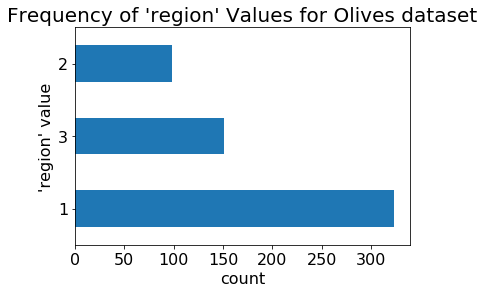

In [147]:
horizontal_barplot = df['region'].value_counts().plot(kind='barh', fontsize=16)
horizontal_barplot.set_title("Frequency of 'region' Values for Olives dataset", fontsize=20)
horizontal_barplot.set_xlabel('count', fontsize=16)
horizontal_barplot.set_ylabel("'region' value", fontsize=16)

## Q17:   Create a horizontal frequency barplot for 'sub_region'

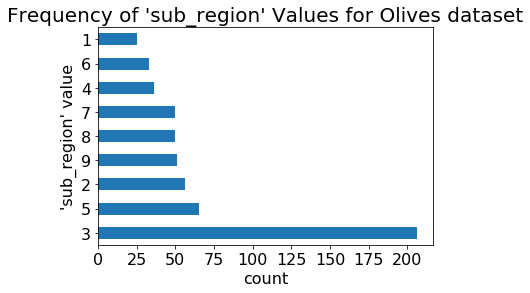

In [148]:
horizontal_barplot = df['sub_region'].value_counts().plot(kind='barh', fontsize=16)
horizontal_barplot.set_title("Frequency of 'sub_region' Values for Olives dataset", fontsize=20)
horizontal_barplot.set_xlabel('count', fontsize=16)
horizontal_barplot.set_ylabel("'sub_region' value", fontsize=16)

## Q18:   Create a horizontal frequency barplot for 'sub_region_desc'

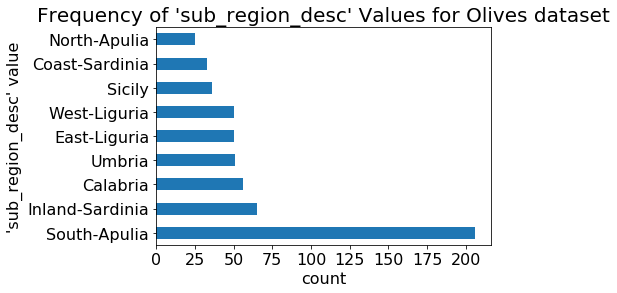

In [149]:
horizontal_barplot = df['sub_region_desc'].value_counts().plot(kind='barh', fontsize=16)
horizontal_barplot.set_title("Frequency of 'sub_region_desc' Values for Olives dataset", fontsize=20)
horizontal_barplot.set_xlabel('count', fontsize=16)
horizontal_barplot.set_ylabel("'sub_region_desc' value", fontsize=16)